## Mental Health and Social Media Consumption - STA141B Final Project


### Group members:
    Samir Cochinwala
    Zain Khalid
    Sriram Subramanian
    Russell Chien

## References
https://www.datacamp.com/tutorial/random-forests-classifier-python

https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56


## Table of Contents

0. Imports
1. Introduction
2. Cleaning Dataset
3. Statistical Visualization
4. Regression / Random forest models
5. API / Web Scraping
6. NLP Analysis
7. Conclusion / Results

## 0. Imports

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from unittest.mock import MagicMock
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import praw
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import nltk 
import nltk.corpus
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Introduction

In 2023, you have 5 year olds who use iPhones, iPads, computers, etc. for multiple hours everyday. On top of this, being aware of your own mental health isn't particularly common. Our day to day lives consist of staring at Instagram, Facebook, Tiktok, etc. But how often do you hear about someone who journals about their feelings, for example. Our motivation behind this project came by reflecting on our daily rituals. We learned that we all woke up and checked our phones, we learned that our study breaks consisted of social media consumption. But we didn't know the impact this had on us. Although social media is a great method of obtaining information in the world, we believe it comes with effects that change your mental health. Social media consumption is extremely high relative to the past. According to: https://www.smartinsights.com/social-media-marketing/social-media-strategy/new-global-social-media-research/#:~:text=The%20number%20of%20social%20media,growth%20of%20%2B137%20million%20users there is a 10% growth YOY of global social media consumption. At first glance, you might think nothing of it, but our projects goal is to reveal the effect social media has on mental health. We will try to find the optimal amount of social media consumption per day as well as clarify the impacts social media has on ones mental health. The goal for this project is to learn about the correlation between social media and mental health and to make people of every age group aware.

## 2. Raw Dataset Rundown

The dataset below is taken from a survey during COVID-19 and was performed in numerous different cities in China. There were multiple questions asked about family relationships, levels of boredom, the epidemic, social media consumption, and mental health states. The dataset contains 917 rows with 88 columns. This meaning there were 917 people who were surveyed and each asked ~88 questions. The questions ranged from how many family members you have to how much you post on social media to how much anxiety you have, etc. By analyzing social media consumption and mental health responses we will predict what level/types of social media are healthy. 

When looking through the dataset, we can clean the data by fixing any typos and renaming columns to be more descriptive. We also combined the traditional media use and new media use into one column, tracking total media use. 

In [3]:

df = pd.read_excel('/Users/samircochinwala/Downloads/sta141b_final/STA141B.xlsx')

df = df.rename(columns={'familymebers': 'familymembers', 'PA': 'Positive Affect', 'NA': 'Negative Affect', 'DA': 'Death Anxiety', 
                        'ML': 'Meaning in Life', 'DEP': 'Depression', 'ANX': 'Anxiety', 'STR': 'Stress', 'NEW': 'New Media Use', 
                        'TRA': 'Traditional Media Use', 'EMP': 'Empathy', 'SYM': 'Sympathy', 'search': 'Search', 
                        'optimism': 'Optimism', 'effect': 'Impact', 'post': 'Post'})
df['Media Use'] = df['Traditional Media Use'] + df['New Media Use']
df['Boredom'] = df['boredom1'] + df['boredom2'] + df['boredom3']


print(df.head())
print(df.columns)

   familymembers location  infection  Impact  familyreunion  \
0              3  Tianjin          0       4              1   
1              4    Gansu          0       4              1   
2              3    Hunan          0       4              1   
3              4   Shanxi          0       3              1   
4              4   Shanxi          0       4              1   

   familyrelationship  Post  Search  boredom1  boredom2  ...  Meaning in Life  \
0                   5     1       2         6         6  ...               24   
1                   4     1       4         6         6  ...               27   
2                   4     0       4         1         1  ...               20   
3                   4     1       4         5         5  ...               22   
4                   4     0       4         7         7  ...               23   

   Depression  Anxiety  Stress  New Media Use  Traditional Media Use  Empathy  \
0          10       13      15              4        

## 3. Data Visualization

### Heatmap



Using seaborn, we can create a heatmap to visualize the correlation between numeric variables in our dataset. With our heatmap, we can clearly see which variables have a high correlation with each other. Specifically, we can see that there is a high correlation between Death Anxiety and Empathy and Negative Affect and Empathy. Some other interesting observations include that those who saw a positive affect in the pandemic also scored their meaning of life questions higher. There is a slightly stronger correlation between negative affect and media use versus positive affect and media use. 

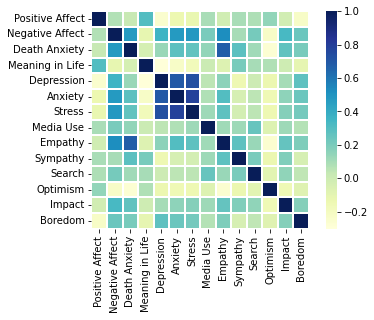

In [4]:
heatmap = df[['Positive Affect', 'Negative Affect', 'Death Anxiety', 'Meaning in Life', 'Depression', 'Anxiety', 'Stress', 
              'Media Use', 'Empathy', 'Sympathy', 'Search', 'Optimism', 'Impact', 'Boredom']] 
corrMatrix = heatmap.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.1, square=True)
plt.show()

Categorial variables: family renuion, post
    

### Scatterplot

We created scatterplots to look for correlation between searching social media and its positive/negative affect it had on users. There seemed to be a even distribution amongst all levels. The dominant answer to the question "Did you actively search for updates on epidemic-related news", was '4' (everyday), which clearly shows the importance of social media to our daily lives. People who answered '4' also had the widest range of positive/negative affect. 

0      24
1      19
2      15
3      21
4      30
       ..
912    21
913    28
914    16
915    17
916    26
Name: Negative Affect, Length: 917, dtype: int64


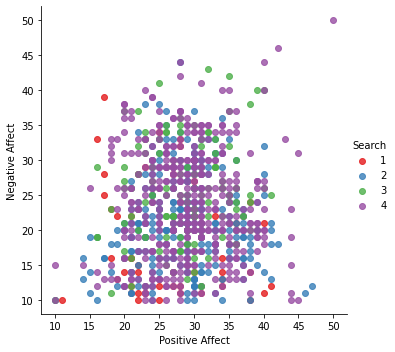

In [5]:
search_df = df[["Positive Affect","Negative Affect","Search"]]
sns.lmplot(x='Positive Affect', y='Negative Affect', data = search_df, hue='Search', fit_reg=False, palette="Set1")

Next, we looked at the relationship between media use, negative affect, and impact COVID had on a person's life. Many people that said COVID did not have a very big impact on their life (< 3) also had higher media use and lower negative affect. While this may suggest that media use may have a positive effect, it is also possible that these people are simply prefer staying inside and do not have the need to meet with people as often. Those that said COVID did have a big impact on their life (> 3) are skewed left towards media use. The negative affect of this group is roughly evenly distributed; perhaps an increase in media use could reduce the negative affect and/or impact of people who answered that COVID did have a big impact on their life. 

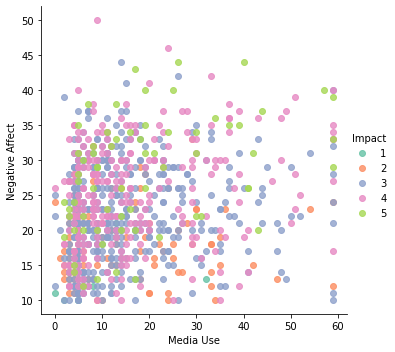

In [6]:
effect_df = df[["Media Use", "Negative Affect", "Impact"]]
sns.lmplot(x='Media Use', y='Negative Affect', data = effect_df, hue='Impact', fit_reg=False, palette="Set2")

### Countplot

We used Seaborn countplots to visualize certain variables and their relationship with the impact of COVID on a person's life. In the first plot, it seems that posting COVID related media does not influence the impact at all. In the second plot, we can clearly see that those who were impacted greatly by COVID have an overall higher boredom. In the third plot, as the amount of searching done increases, the impact of COVID also increases. In the fourth plot, we can see that those with a lower optimism level in turn believe COVID has had a greater impact on their life. These plots suggest the importance social media has in order for us to connect with others. 

<AxesSubplot:xlabel='Optimism', ylabel='count'>

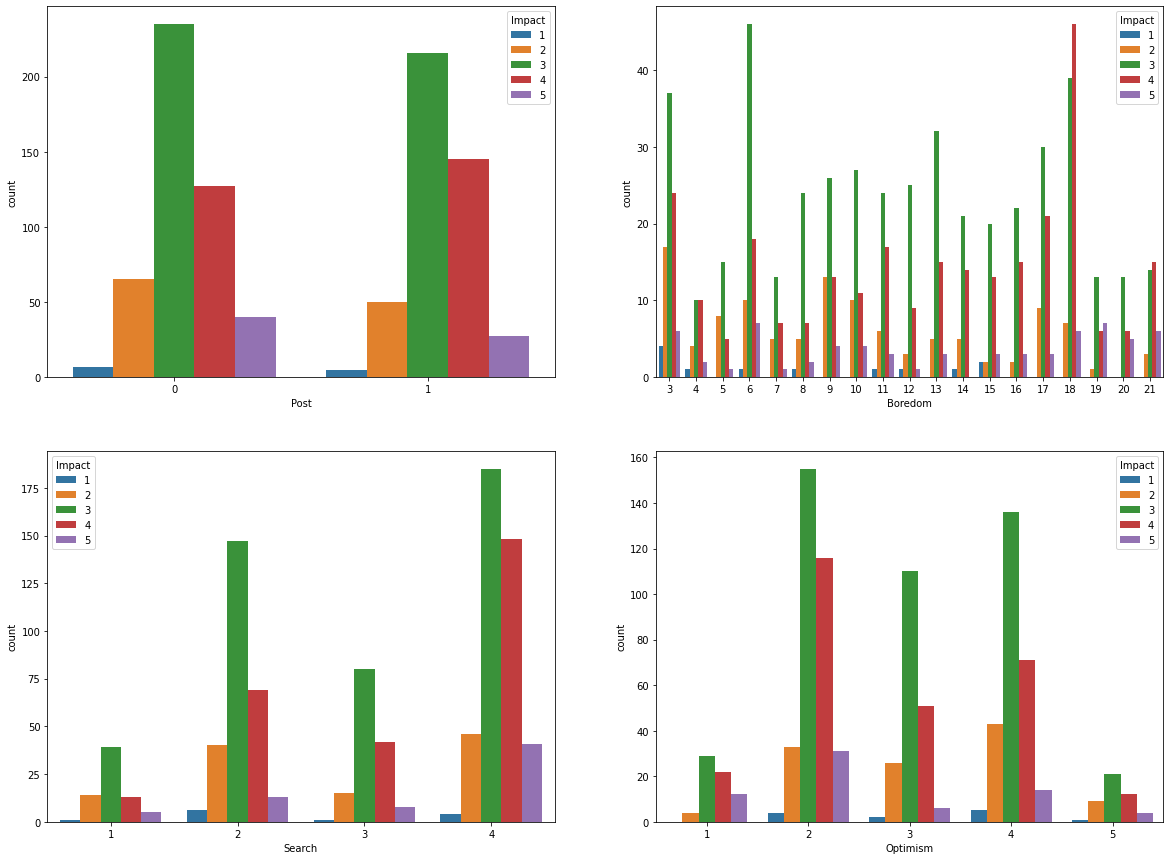

In [7]:
fig,[[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=[20,15])
sns.countplot(x='Post', data = df, hue='Impact', ax=ax1)
sns.countplot(x='Boredom', data = df, hue='Impact', ax=ax2)
sns.countplot(x='Search', data = df, hue='Impact', ax=ax3)
sns.countplot(x='Optimism', data = df, hue='Impact', ax=ax4)

## 4.Models

#### Making Training and Testing Data

<AxesSubplot:>

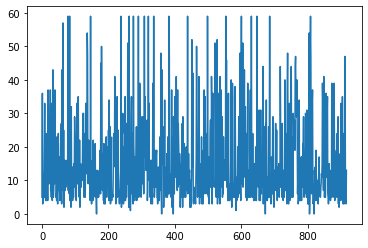

In [8]:
# making train/test data 

features = df[['Negative Affect','Death Anxiety', 'Depression']].copy() #'Anxiety', 'Stress']].copy()
X = features 
y = df['Media Use'].copy()
y.plot()

In [9]:
# 0-19 = low
# 20-39 = medium
# 40-59 = high 
# split media use into 3 categories
for i in range(len(y)):
    if y[i] <= 19:
        y[i] = 'low'
    elif y[i] >= 20 and y[i] <= 39:
        y[i] = 'medium'
    else:
        y[i] = 'high'

In [10]:
print(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

0         low
1      medium
2         low
3         low
4         low
        ...  
912      high
913       low
914       low
915       low
916       low
Name: Media Use, Length: 917, dtype: object


### Logistic Regression Model

logistic regression model:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.73      1.00      0.84       167
      medium       0.00      0.00      0.00        49

    accuracy                           0.73       230
   macro avg       0.24      0.33      0.28       230
weighted avg       0.53      0.73      0.61       230



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

0.7260869565217392

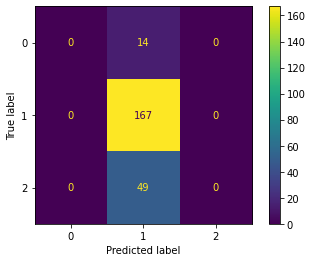

In [11]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
print('logistic regression model:\n {}'.format(classification_report(y_test,y_pred_LR)))
LR_cm = confusion_matrix(y_test, y_pred_LR)
ConfusionMatrixDisplay(confusion_matrix=LR_cm).plot();
accuracy_score(y_test, y_pred_LR)

In [12]:
print(classification_report(y_test, y_pred_LR)) 


              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.73      1.00      0.84       167
      medium       0.00      0.00      0.00        49

    accuracy                           0.73       230
   macro avg       0.24      0.33      0.28       230
weighted avg       0.53      0.73      0.61       230



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

We believe that the logistic regression model overfitted because there are a lot more low media use entries compared to medium/high. As we can see from our confusion matrix, our model predicted everything to be low media use. As a result, we believe our model focused too much on our training dataset and is therefore innacurate. 

### RandomForest Model/Classifier

In [13]:
# making random forest model and training it 
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.6478260869565218


### Random Forest Visualization

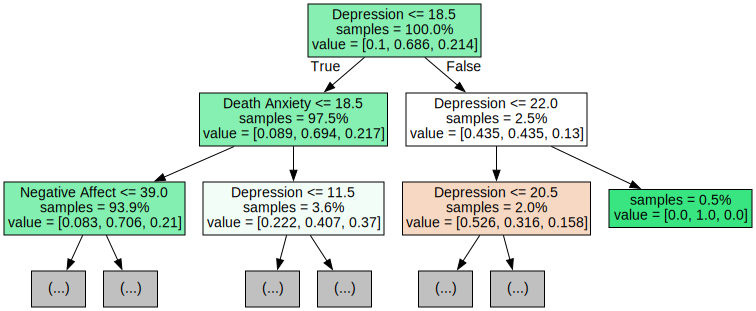

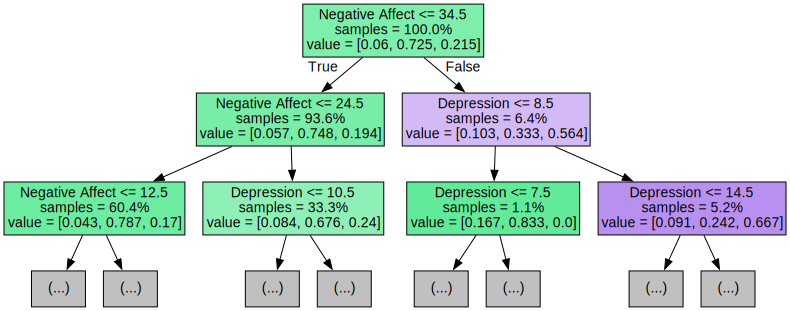

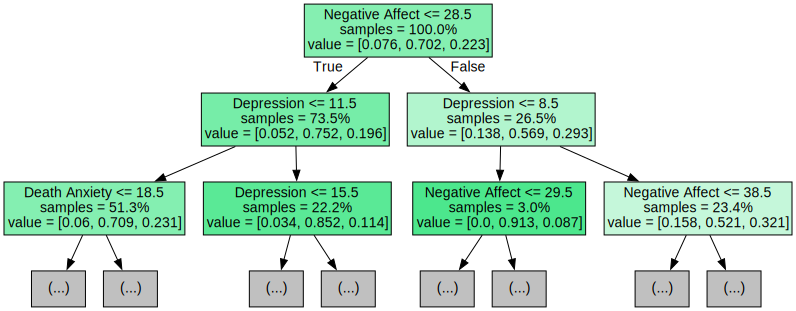

In [15]:
for i in range(3):
    tree = RF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Analysis of Model 

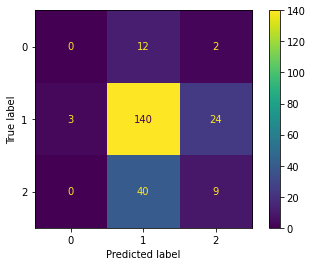

In [16]:
y_pred = RF.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Our model correctly determined low usage of media 139 times out of 167. However, our model also was only successful 8/49 times when determining if something was high media usage. 

In [17]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        14
         low       0.73      0.84      0.78       167
      medium       0.26      0.18      0.21        49

    accuracy                           0.65       230
   macro avg       0.33      0.34      0.33       230
weighted avg       0.58      0.65      0.61       230



The precision is the ability of the model to correctly classify if media use is not low, medium, or high correctly.
The recall is the ability for the model to to correctly find all positive instances. The random forest model also is more effective than the logistic regression model assuming it has overfitted. We don't have enough data to accurately predict high data usage. For medium media usage, there are many different factors that can affect a given persons mental health, in addition to social media use.  

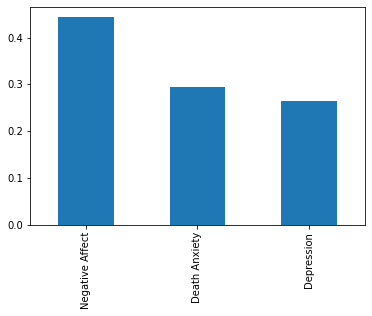

In [18]:
# Chart to show feature importance
feature_importances = pd.Series(RF.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

As we can see negative affect is the most important feature in correlation to media use. A conclusion we can draw from this is negative affect and media use are more tightly related than other things like death anxiety and depression. This goes hand in hand with our question of the project. The feature importance in this model is very important because it helps us learn correlation of mental health and social media usage. Based on our random forest model we can say that there is a decently strong relationship between bad mental health (negative affect) and social media compared to the other 2 features. However, we cannot certainly say that a bad mental health correlates directly to high media use.  

## 5. Reddit API

The question we want to answer does the affect of prolonged social media use indicate with a more depressed individual. To accomplish this task we utilized the reddit API to observe if the average user karma score influences the subreddits related to mental health, like depression and adhd compared to other generic subreddits. The user karma score is a way of measuring the user activity on posts, analyzing factors like upvotes, comments, etc

In [1]:

# Authenticate with Reddit API using your own client ID, secret and user agent
reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# Define a list of subreddits to get data from
subreddits = ['depression', 'adhd','ucdavis','OnePiece','bicycling','skyrim', 'leagueoflegends', 'counterstrike','animememes']

# Create an empty list to store author data
authors = []

# Loop through each subreddit and get the top 10 posts of the week
for subreddit in subreddits:
    subreddit_posts = reddit.subreddit(subreddit).top('week', limit=5)
    
    # Loop through each post and add author data to the list
    for post in subreddit_posts:
        author_data = {'Subreddit': subreddit, 'Author': post.author.name, 'Karma': post.author.link_karma}
        authors.append(author_data)

# Create a dataframe from the author list
df = pd.DataFrame(authors)

# Calculate average karma by subreddit and print it out
avg_karma_by_subreddit = df.groupby('Subreddit')['Karma'].mean()
print(avg_karma_by_subreddit)


/var/folders/m9/1yz_lqls7mb0b1hr3kbkr81w0000gn/T/ipykernel_4232/409246215.py:17: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit_posts = reddit.subreddit(subreddit).top('week', limit=5)


Subreddit
OnePiece           21478.2
adhd                9928.6
animememes         22594.2
bicycling           1947.6
counterstrike       2157.8
depression         12352.8
leagueoflegends    17061.2
skyrim             39478.4
ucdavis             7093.2
Name: Karma, dtype: float64


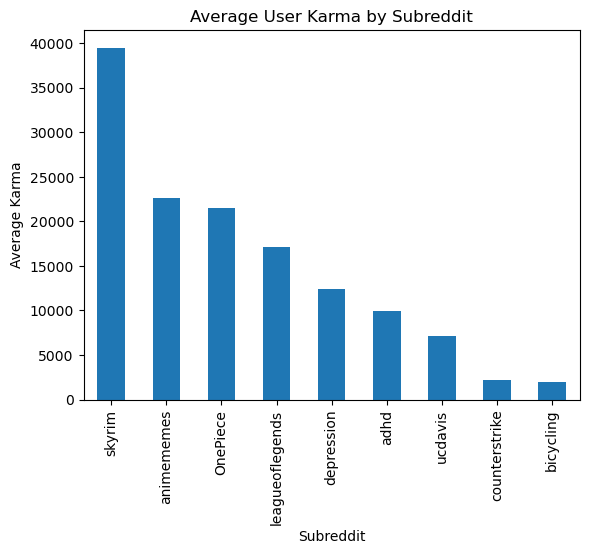

In [2]:

# Calculate average karma by subreddit and plot it
avg_karma_by_subreddit = df.groupby('Subreddit')['Karma'].mean()
avg_karma_by_subreddit_sorted = avg_karma_by_subreddit.sort_values(ascending=False)  # sort in descending order
avg_karma_by_subreddit_sorted.plot.bar()
plt.title('Average User Karma by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Karma')

plt.show()




In this case, we see that the average user karma score doesn’t play a large role in affecting mental health negatively, due to less interaction within these subreddits. This however seems to directly contradict with our previous assumptions of the report. Since the average karma for the average /depression user is pretty low. The next assumption we made is it might be low because the average account age might also be super low as well. Since it would make sense for users to make a secondary post on these mental health subreddits, to ensure their anominity. 

In [3]:


# Authenticate with Reddit API using your own client ID, secret and user agent
reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# Define a list of subreddits to get data from
subreddits = ['depression', 'adhd','ucdavis','OnePiece','bicycling','skyrim', 'leagueoflegends', 'counterstrike','animememes']


# Create an empty list to store author data
authors = []

# Loop through each subreddit and get the top 10 posts of the week
for subreddit in subreddits:
    subreddit_posts = reddit.subreddit(subreddit).top('week', limit=17)
    
    # Loop through each post and add author data to the list
    for post in subreddit_posts:
        author_data = {'Subreddit': subreddit, 'Author': post.author.name, 'Created': post.author.created_utc}
        authors.append(author_data)

# Create a dataframe from the author list
df = pd.DataFrame(authors)

# Convert created_utc to datetime and calculate account age in days
df['Created'] = df['Created'].apply(datetime.utcfromtimestamp)
df['Account Age'] = (datetime.utcnow() - df['Created']).dt.days

# Calculate average account age by subreddit and print it out
avg_account_age_by_subreddit = df.groupby('Subreddit')['Account Age'].mean()
print(avg_account_age_by_subreddit)




/var/folders/m9/1yz_lqls7mb0b1hr3kbkr81w0000gn/T/ipykernel_4232/115082199.py:19: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit_posts = reddit.subreddit(subreddit).top('week', limit=17)


Subreddit
OnePiece            876.588235
adhd               1327.294118
animememes          520.176471
bicycling          1256.235294
counterstrike       954.352941
depression          628.000000
leagueoflegends    1916.647059
skyrim             1494.176471
ucdavis            1143.235294
Name: Account Age, dtype: float64


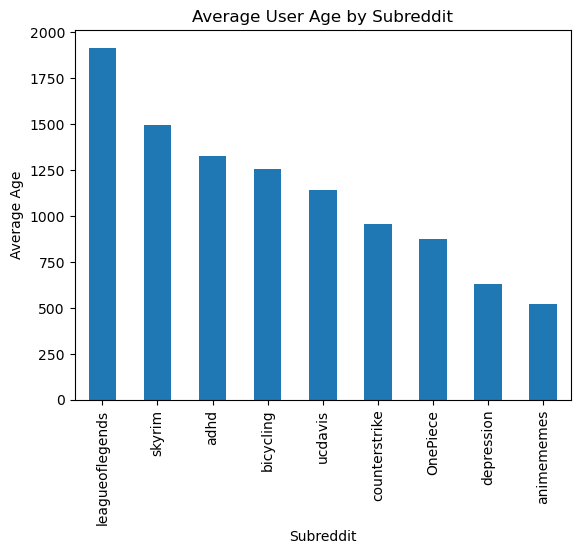

In [4]:

# Calculate average karma by subreddit and plot it
avg_karma_by_subreddit = df.groupby('Subreddit')['Account Age'].mean()
avg_karma_by_subreddit_sorted = avg_karma_by_subreddit.sort_values(ascending=False)  # sort in descending order
avg_karma_by_subreddit_sorted.plot.bar()
plt.title('Average User Age by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Age')
plt.show()

Judging from this plot, even though the average account age for the average user from r/depression is significantly low, the average account age for average user from r/adhd is still relatively high.  In this case it is hard to tell for certain if more screen time may or may not correlate to a user being more active on mental health subreddits since there is a lot of variability such as the amount of users making a secondary account to post

## 6. NLP Analysis 

In [1]:


reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# specify the subreddit we want to analyze
subreddit = reddit.subreddit("depression")

# fetch the top 100 posts from the past week
posts = subreddit.top("week", limit=200)

# create an empty list to store post information
post_info = []

# loop through each post and extract relevant information
for post in posts:
    if post.author is not None:
        post_info.append({
            "User": post.author.name,
            "Score": post.score,
            "Title": post.title,
            "Created": post.created_utc,
        })

# create a pandas dataframe from the list of post information
df_depression = pd.DataFrame(post_info)

# print the dataframe
print(df_depression)

/var/folders/l3/4xld9h9n26l3fwr2173h84tw0000gn/T/ipykernel_10766/3005512874.py:17: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  posts = subreddit.top("week", limit=200)


                     User  Score  \
0             No-Yak-9783   1284   
1              LightofJah    564   
2               abudz5150    526   
3    hereismydumbusername    496   
4           LoudCustard82    450   
..                    ...    ...   
195      True_Benefit6719      6   
196          ItzAlwayz420      6   
197           JamalHaniki      5   
198     Throwaway67891099      7   
199     ItsAllAnIllusion-      7   

                                                 Title       Created  
0                       I'd like to sleep my life away  1.679139e+09  
1    I reconnected with an old friend and they aske...  1.679251e+09  
2                      Sick of telling people I’m good  1.678968e+09  
3                            I wish I was born normal.  1.679319e+09  
4                            I cry literally everyday.  1.679082e+09  
..                                                 ...           ...  
195                                    Forgot who I am  1.679251e+09  

In [2]:


reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# specify the subreddit we want to analyze
subreddit = reddit.subreddit("teenagers")

# fetch the top 100 posts from the past week
posts = subreddit.top("week", limit=200)

# create an empty list to store post information
post_info = []

# loop through each post and extract relevant information
for post in posts:
    if post.author is not None:
        post_info.append({
            "User": post.author.name,
            "Score": post.score,
            "Title": post.title,
            "Created": post.created_utc,
        })

# create a pandas dataframe from the list of post information
df_teenagers = pd.DataFrame(post_info)

# print the dataframe
print(df_teenagers)

/var/folders/l3/4xld9h9n26l3fwr2173h84tw0000gn/T/ipykernel_10766/1967483789.py:12: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  posts = subreddit.top("week", limit=200)


                    User  Score  \
0      FriendlyDiver6453  13021   
1     throwawayyyyayayyy   6971   
2            Magikarp_25   6072   
3             Snoo_24645   5924   
4                 pertaP   5650   
..                   ...    ...   
195           Push_kar20     61   
196  shaquille_wholemeal     61   
197           SteakGrill     59   
198     Stupid_Brain_Fog     64   
199          Inhuman1105     58   

                                                 Title       Created  
0        there is no fucking way i just got this email  1.679347e+09  
1    The girl I'm dating just got me a stuffed anim...  1.679154e+09  
2          I've never wanted to find the designer more  1.678879e+09  
3    Should I speak up if I can hear my mom's bf sl...  1.679054e+09  
4    I found a huge pack of condom in my 13 years o...  1.679238e+09  
..                                                 ...           ...  
195  Finally got my hands on the Chainsaw Man Manga...  1.679403e+09  
196  Guys, 

In [3]:


reddit = praw.Reddit(client_id='BXdMZ7nRNEr0kahVVNH_DQ',
                     client_secret='efsc1ZRlVrmez8JHbQ5h9dN8UcJ68Q',
                     user_agent='Zain Khalid')

# specify the subreddit we want to analyze
subreddit = reddit.subreddit("mentalillness")

# fetch the top 100 posts from the past week
posts = subreddit.top("week", limit=200)

# create an empty list to store post information
post_info = []

# loop through each post and extract relevant information
for post in posts:
    if post.author is not None:
        post_info.append({
            "User": post.author.name,
            "Score": post.score,
            "Title": post.title,
            "Created": post.created_utc,
        })

# create a pandas dataframe from the list of post information
df_mentalillness = pd.DataFrame(post_info)

# print the dataframe
print(df_mentalillness)

/var/folders/l3/4xld9h9n26l3fwr2173h84tw0000gn/T/ipykernel_10766/711294130.py:12: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  posts = subreddit.top("week", limit=200)


                     User  Score  \
0               Alfaviper    194   
1     SundaeDangerous3996    122   
2                 JotaD21    106   
3    Puzzleheaded-Pin-146    107   
4         Sandybeaches806     74   
..                    ...    ...   
194       Screaming_miind      1   
195            sabrinam98      1   
196     ChemicalLength364      1   
197           charlie_gae      2   
198    grubby_anticholine      1   

                                                 Title       Created  
0    The only reason why I am alive is because of m...  1.678917e+09  
1    Boyfriend threathens suicide, if i mention bre...  1.679153e+09  
2    If i'm chronically depressed, should i just no...  1.679361e+09  
3                 Why mental hospitals are so abusive?  1.678861e+09  
4    I hate that my mother got me diagnosed with au...  1.679033e+09  
..                                                 ...           ...  
194                                             Voices  1.679438e+09  

In [4]:
text = ''
text = text.join(str(i + " ") for i in df_depression["Title"][0:100])
text = text.join(str(i + " ") for i in df_mentalillness["Title"][0:100])
text = text.join(str(i + " ") for i in df_teenagers["Title"][0:100])

In [5]:
text2 = ''
text2 = text2.join(str(i + " ") for i in df_depression["Title"][100:200])
text2 = text2.join(str(i + " ") for i in df_mentalillness["Title"][100:200])
text2 = text2.join(str(i + " ") for i in df_teenagers["Title"][100:200])

In [6]:
text_words = nltk.word_tokenize(text)

In [7]:
text2_words = nltk.word_tokenize(text2)

In [8]:
lower = [w.lower() for w in text_words]

In [9]:
lower2 = [w.lower() for w in text2_words]

In [10]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")
#displaying all words that are not a a part of the stopwords in english
text_words_cleaned = [w for w in text_words if w not in stopwords]
stopword = ['I']
text_words_cleaned = [w for w in text_words_cleaned if w not in stopword]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriramsubramanian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")
#displaying all words that are not a a part of the stopwords in english
text2_words_cleaned = [w for w in text2_words if w not in stopwords]
stopword = ['I']
text2_words_cleaned = [w for w in text2_words_cleaned if w not in stopword]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriramsubramanian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


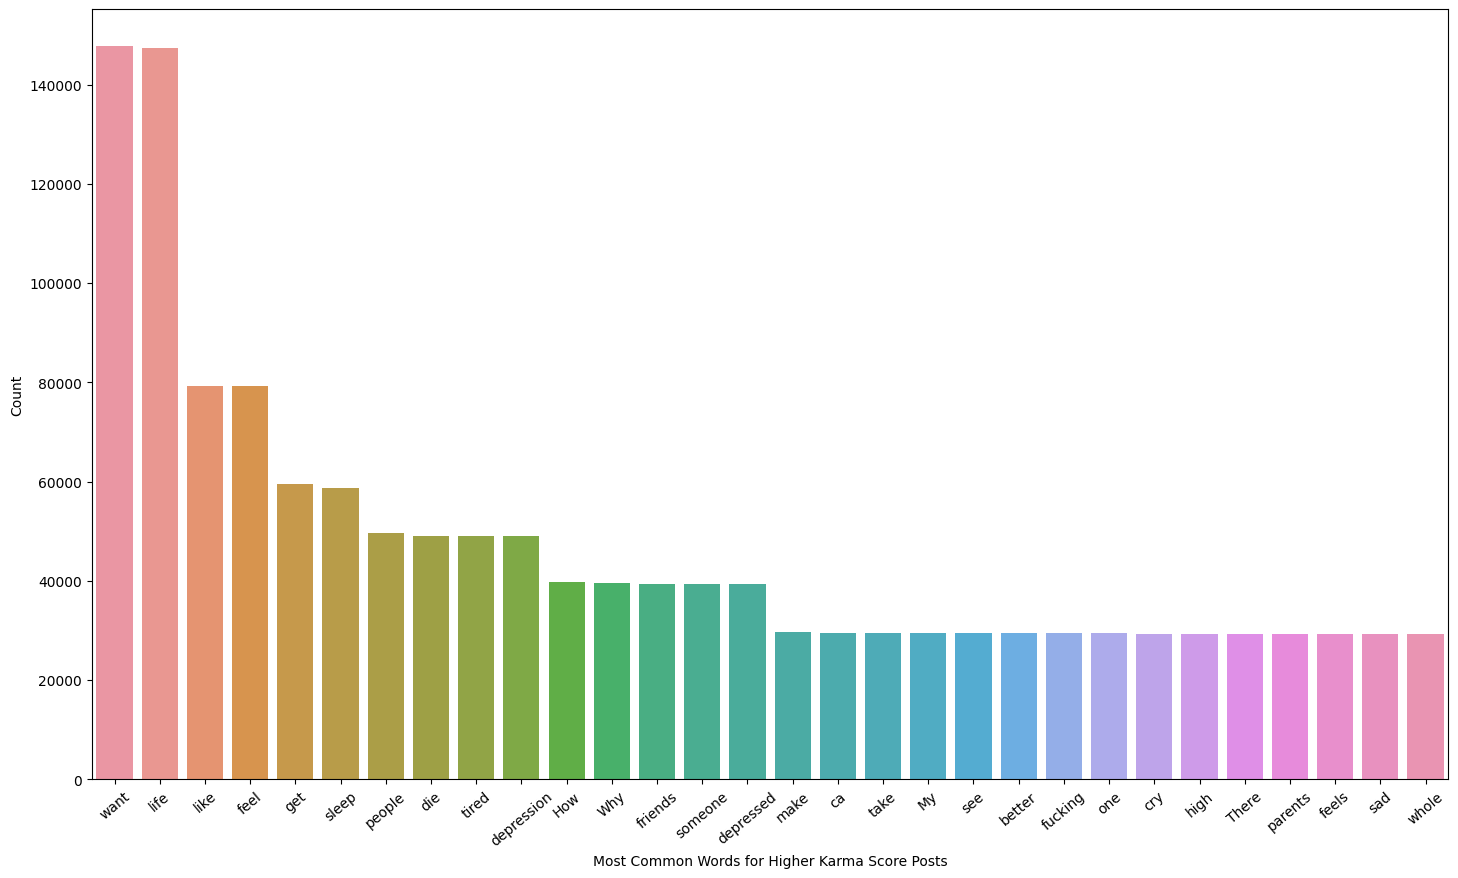

In [15]:
fq = nltk.FreqDist(w for w in text_words_cleaned if w.isalnum()).most_common(30)
fq = pd.Series(dict(fq))
fig, ax = plt.subplots(figsize=(17.5,10))
fq_plot = sns.barplot(x=fq.index, y=fq.values, ax=ax)
plt.xticks(rotation=40)
ax.set(xlabel='Most Common Words for Higher Karma Score Posts', ylabel='Count')
plt.show()

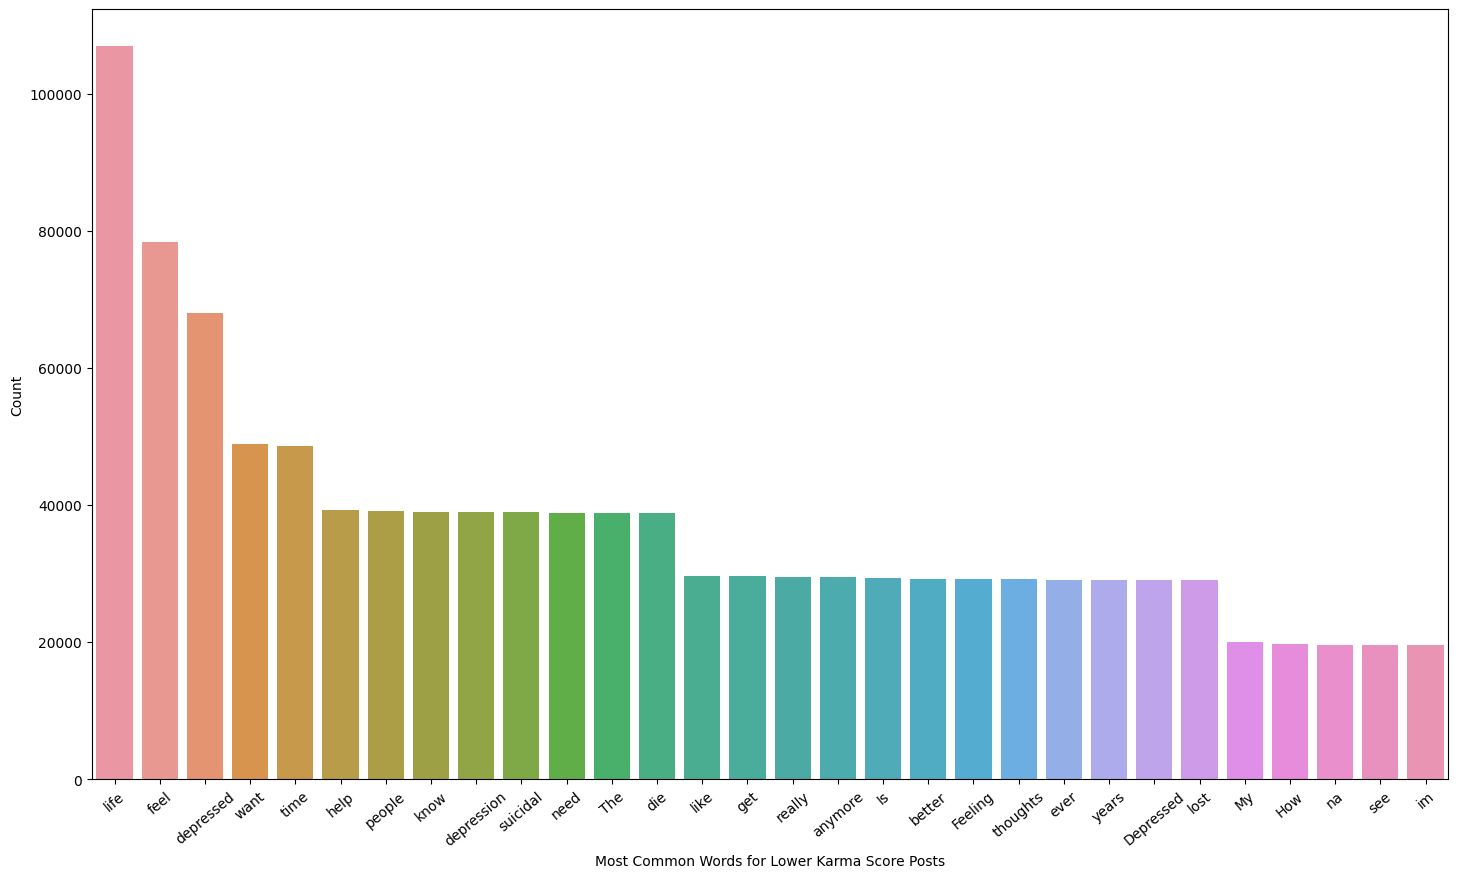

In [16]:
fq = nltk.FreqDist(w for w in text2_words_cleaned if w.isalnum()).most_common(30)
fq = pd.Series(dict(fq))
fig, ax = plt.subplots(figsize=(17.5,10))
fq_plot = sns.barplot(x=fq.index, y=fq.values, ax=ax)
plt.xticks(rotation=40)
ax.set(xlabel='Most Common Words for Lower Karma Score Posts', ylabel='Count')
plt.show()

We also conducted an NLP analysis on the posts we retrieved through the reddit API, specifically through subreddits depression, mental illness, and teenagers. The NLP analysis was mainly to analyze the frequencies of the most common words seen through the top 200 posts across all three subreddits, and see if the karma score plays a correlation in the type of words resulted. From the plot for the higher karma scores, we see several negative connotation words related to mental illness like depression, die, suicide, tired, help, cry, etc. along with more derogatory language appeared a lot more in the posts with a higher karma score as compared to the ones with a lower score. We see that user activity increases with posts within these subreddits that contain more of a negative perception and language. Usually, users interact with posts that they can relate to or interested in, possibly showing a rise in mental health issues across users. 

## 7. Conclusion

To summarize, our analysis of the dataset taken from Chinese residents in various cities in China show that a low social media use suggests better mental health. Many people that said COVID did not have a very big impact on their life also had higher media use and lower negative affect. While this may suggest that media use may have a positive effect, it is also possible that these people are simply prefer staying inside and do not have the need to meet with people as often. Furthermore, training a logistic regression and random forest model showed that social media use is one of the many factors that affects one's mental health. In the future, we can improve on our negative affect prediction model with a larger dataset since our model was not very accurate when predicting high and medium media use. While we were able to accurately predict low media usage, there were many more data entries for low media use as opposed to high/medium. Based on our random forest model we can say that there is some correlation between bad mental health (negative affect) and social media. However, we cannot certainly say that a bad mental health correlates directly to high media use, but our analysis does support the fact that low social media use reflects better mental health.

In conclusion, after working with the Reddit API, it is clear to us that there is a lot of variables that effect a user from posting on mental health subreddits. It is naive to assume that a users reddit karma is the only factor that influences the mental health of user, there are variables such as account age and just because a user has a high karma does not nesecarily mean in a mentally unhealthy person. There seems to be a correlation between the average karma score and the amount of negative language used in the posts, however, as we got through our NLP analysis. This can be due to a number of factors, so would definitely require further analysis to get the exact factors that, if any, that causes this correlation. These conclusions, even though they were not the ones we were looking for, were important for us to gain a greater understanding on the effect social media has on mental health.